# Breaking a CAPTCHA system


In [61]:
CAPTCHA_IMAGE_FOLDER = "generated_captcha_images"

## Step 1: Extract single letters from CAPTCHA images

### Run the following code to show 10 images to take a look.

In [15]:
import os.path
import glob # glob.glob returns the list of files with their full path, and it supports wildcards

from IPython.display import Image

captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))

for (i, captcha_image_file) in enumerate(captcha_image_files):
    if i==10: break
    print(captcha_image_file)
    display(Image(filename=captcha_image_file))

generated_captcha_images\222X.png


generated_captcha_images\226U.png


generated_captcha_images\2274.png


generated_captcha_images\22A6.png


generated_captcha_images\22BJ.png


generated_captcha_images\22HS.png


generated_captcha_images\22KD.png


generated_captcha_images\22L9.png


generated_captcha_images\22NR.png


generated_captcha_images\22PL.png


### Now we illustrate how to process an image `generated_captcha_images/222X.png`

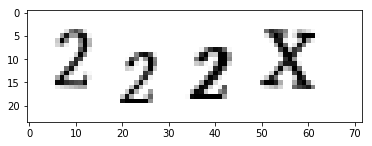

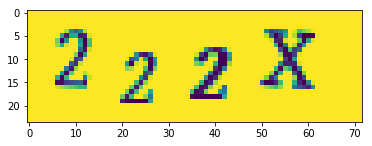

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

captcha_image_file = 'generated_captcha_images/222X.png' 

captcha_correct_text = os.path.splitext(captcha_image_file)[0]

# Load the image and convert it to grayscale
image = cv2.imread(captcha_image_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Show the image with matplotlib
plt.imshow(image)
plt.show()

plt.imshow(gray)
plt.show()

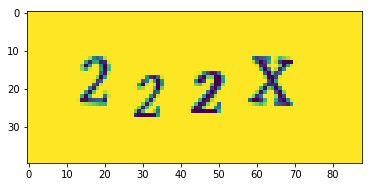

In [18]:
# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

plt.imshow(gray)
plt.show()

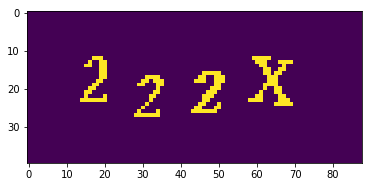

In [19]:
#Threshold the image with Otsu’s binarization
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

plt.imshow(thresh)
plt.show()

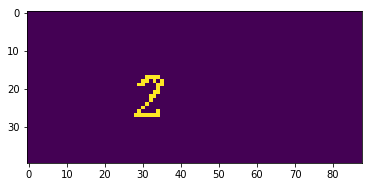

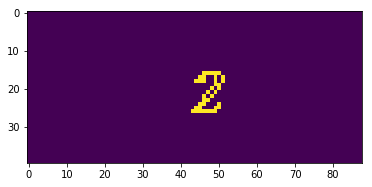

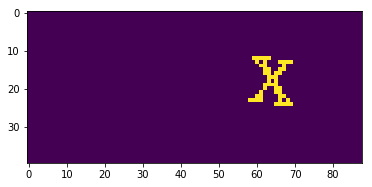

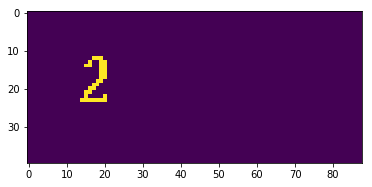

In [20]:
import numpy as np

# find the contours (continuous blobs of pixels) the image
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

zero_img = np.zeros_like(thresh)

for i in range(len(contours)):
    temp = cv2.drawContours(zero_img.copy(), contours, i, (255,0,0), 1)
    plt.imshow(temp)
    plt.show()

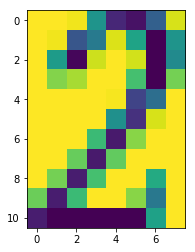

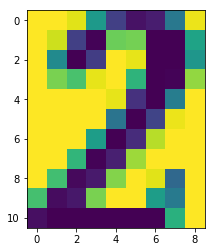

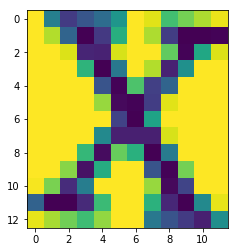

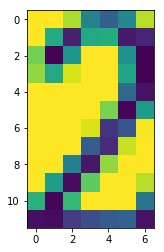

In [21]:
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image = gray[y:y+h, x:x+w]
    plt.imshow(letter_image)
    plt.show()

### Putting things together: get letters from images

Using what we have learnt above, write your code to save get the letters of all images. The letter-images are stored as 32 folders under folder `extracted_letter_images`.

For example, `extracted_letter_images/A` is a folder that saves all images of letter `A`. After you complete, each letter-folder should contain over 1000 letter-images.

Hint: (1) consider how to name different files in a letter-folder differently? (2) ingore those images with number of contours other than 4.

In [22]:
import os
import glob
import imutils
import cv2

LETTER_IMAGES_FOLDER = "extracted_letter_images"
SKIPPED_FOLDER = "skipped_images"
counts = {} 

# loop over the image paths
for (i, captcha_image_file) in enumerate(captcha_image_files):
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)))

    # getting file name
    filename = os.path.basename(captcha_image_file)
    captcha_correct_text = os.path.splitext(filename)[0]

    # Load image and convert to grayscale
    image = cv2.imread(captcha_image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Adding extra padding around the image
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    # threshold the image with otsu's binarization
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if imutils.is_cv2() else contours[1]

    letter_image_regions = []

    
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        # Compare countour width and height
        if w / h > 1.25:
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            letter_image_regions.append((x, y, w, h))

    # If we found more or less than 4 letters in the captcha, save to skipped
    if len(letter_image_regions) != 4:
        cv2.imwrite(SKIPPED_FOLDER + "/" + captcha_correct_text + ".png", image)
    else:
        letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

    #give each letter a single image
    for letter_bounding_box, letter_text in zip(letter_image_regions, captcha_correct_text):
        
        x, y, w, h = letter_bounding_box
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        #saving image
        save_path = os.path.join(LETTER_IMAGES_FOLDER, letter_text)
        if not os.path.exists(save_path):
            os.makedirs(save_path)

        #image to file
        count = counts.get(letter_text, 1)
        p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
        cv2.imwrite(p, letter_image)
        counts[letter_text] = count + 1


[INFO] processing image 1/9955
[INFO] processing image 2/9955
[INFO] processing image 3/9955
[INFO] processing image 4/9955
[INFO] processing image 5/9955
[INFO] processing image 6/9955
[INFO] processing image 7/9955
[INFO] processing image 8/9955
[INFO] processing image 9/9955
[INFO] processing image 10/9955
[INFO] processing image 11/9955
[INFO] processing image 12/9955
[INFO] processing image 13/9955
[INFO] processing image 14/9955
[INFO] processing image 15/9955
[INFO] processing image 16/9955
[INFO] processing image 17/9955
[INFO] processing image 18/9955
[INFO] processing image 19/9955
[INFO] processing image 20/9955
[INFO] processing image 21/9955
[INFO] processing image 22/9955
[INFO] processing image 23/9955
[INFO] processing image 24/9955
[INFO] processing image 25/9955
[INFO] processing image 26/9955
[INFO] processing image 27/9955
[INFO] processing image 28/9955
[INFO] processing image 29/9955
[INFO] processing image 30/9955
[INFO] processing image 31/9955
[INFO] processing

[INFO] processing image 254/9955
[INFO] processing image 255/9955
[INFO] processing image 256/9955
[INFO] processing image 257/9955
[INFO] processing image 258/9955
[INFO] processing image 259/9955
[INFO] processing image 260/9955
[INFO] processing image 261/9955
[INFO] processing image 262/9955
[INFO] processing image 263/9955
[INFO] processing image 264/9955
[INFO] processing image 265/9955
[INFO] processing image 266/9955
[INFO] processing image 267/9955
[INFO] processing image 268/9955
[INFO] processing image 269/9955
[INFO] processing image 270/9955
[INFO] processing image 271/9955
[INFO] processing image 272/9955
[INFO] processing image 273/9955
[INFO] processing image 274/9955
[INFO] processing image 275/9955
[INFO] processing image 276/9955
[INFO] processing image 277/9955
[INFO] processing image 278/9955
[INFO] processing image 279/9955
[INFO] processing image 280/9955
[INFO] processing image 281/9955
[INFO] processing image 282/9955
[INFO] processing image 283/9955
[INFO] pro

[INFO] processing image 503/9955
[INFO] processing image 504/9955
[INFO] processing image 505/9955
[INFO] processing image 506/9955
[INFO] processing image 507/9955
[INFO] processing image 508/9955
[INFO] processing image 509/9955
[INFO] processing image 510/9955
[INFO] processing image 511/9955
[INFO] processing image 512/9955
[INFO] processing image 513/9955
[INFO] processing image 514/9955
[INFO] processing image 515/9955
[INFO] processing image 516/9955
[INFO] processing image 517/9955
[INFO] processing image 518/9955
[INFO] processing image 519/9955
[INFO] processing image 520/9955
[INFO] processing image 521/9955
[INFO] processing image 522/9955
[INFO] processing image 523/9955
[INFO] processing image 524/9955
[INFO] processing image 525/9955
[INFO] processing image 526/9955
[INFO] processing image 527/9955
[INFO] processing image 528/9955
[INFO] processing image 529/9955
[INFO] processing image 530/9955
[INFO] processing image 531/9955
[INFO] processing image 532/9955
[INFO] pro

[INFO] processing image 760/9955
[INFO] processing image 761/9955
[INFO] processing image 762/9955
[INFO] processing image 763/9955
[INFO] processing image 764/9955
[INFO] processing image 765/9955
[INFO] processing image 766/9955
[INFO] processing image 767/9955
[INFO] processing image 768/9955
[INFO] processing image 769/9955
[INFO] processing image 770/9955
[INFO] processing image 771/9955
[INFO] processing image 772/9955
[INFO] processing image 773/9955
[INFO] processing image 774/9955
[INFO] processing image 775/9955
[INFO] processing image 776/9955
[INFO] processing image 777/9955
[INFO] processing image 778/9955
[INFO] processing image 779/9955
[INFO] processing image 780/9955
[INFO] processing image 781/9955
[INFO] processing image 782/9955
[INFO] processing image 783/9955
[INFO] processing image 784/9955
[INFO] processing image 785/9955
[INFO] processing image 786/9955
[INFO] processing image 787/9955
[INFO] processing image 788/9955
[INFO] processing image 789/9955
[INFO] pro

[INFO] processing image 1010/9955
[INFO] processing image 1011/9955
[INFO] processing image 1012/9955
[INFO] processing image 1013/9955
[INFO] processing image 1014/9955
[INFO] processing image 1015/9955
[INFO] processing image 1016/9955
[INFO] processing image 1017/9955
[INFO] processing image 1018/9955
[INFO] processing image 1019/9955
[INFO] processing image 1020/9955
[INFO] processing image 1021/9955
[INFO] processing image 1022/9955
[INFO] processing image 1023/9955
[INFO] processing image 1024/9955
[INFO] processing image 1025/9955
[INFO] processing image 1026/9955
[INFO] processing image 1027/9955
[INFO] processing image 1028/9955
[INFO] processing image 1029/9955
[INFO] processing image 1030/9955
[INFO] processing image 1031/9955
[INFO] processing image 1032/9955
[INFO] processing image 1033/9955
[INFO] processing image 1034/9955
[INFO] processing image 1035/9955
[INFO] processing image 1036/9955
[INFO] processing image 1037/9955
[INFO] processing image 1038/9955
[INFO] process

[INFO] processing image 1254/9955
[INFO] processing image 1255/9955
[INFO] processing image 1256/9955
[INFO] processing image 1257/9955
[INFO] processing image 1258/9955
[INFO] processing image 1259/9955
[INFO] processing image 1260/9955
[INFO] processing image 1261/9955
[INFO] processing image 1262/9955
[INFO] processing image 1263/9955
[INFO] processing image 1264/9955
[INFO] processing image 1265/9955
[INFO] processing image 1266/9955
[INFO] processing image 1267/9955
[INFO] processing image 1268/9955
[INFO] processing image 1269/9955
[INFO] processing image 1270/9955
[INFO] processing image 1271/9955
[INFO] processing image 1272/9955
[INFO] processing image 1273/9955
[INFO] processing image 1274/9955
[INFO] processing image 1275/9955
[INFO] processing image 1276/9955
[INFO] processing image 1277/9955
[INFO] processing image 1278/9955
[INFO] processing image 1279/9955
[INFO] processing image 1280/9955
[INFO] processing image 1281/9955
[INFO] processing image 1282/9955
[INFO] process

[INFO] processing image 1500/9955
[INFO] processing image 1501/9955
[INFO] processing image 1502/9955
[INFO] processing image 1503/9955
[INFO] processing image 1504/9955
[INFO] processing image 1505/9955
[INFO] processing image 1506/9955
[INFO] processing image 1507/9955
[INFO] processing image 1508/9955
[INFO] processing image 1509/9955
[INFO] processing image 1510/9955
[INFO] processing image 1511/9955
[INFO] processing image 1512/9955
[INFO] processing image 1513/9955
[INFO] processing image 1514/9955
[INFO] processing image 1515/9955
[INFO] processing image 1516/9955
[INFO] processing image 1517/9955
[INFO] processing image 1518/9955
[INFO] processing image 1519/9955
[INFO] processing image 1520/9955
[INFO] processing image 1521/9955
[INFO] processing image 1522/9955
[INFO] processing image 1523/9955
[INFO] processing image 1524/9955
[INFO] processing image 1525/9955
[INFO] processing image 1526/9955
[INFO] processing image 1527/9955
[INFO] processing image 1528/9955
[INFO] process

[INFO] processing image 1742/9955
[INFO] processing image 1743/9955
[INFO] processing image 1744/9955
[INFO] processing image 1745/9955
[INFO] processing image 1746/9955
[INFO] processing image 1747/9955
[INFO] processing image 1748/9955
[INFO] processing image 1749/9955
[INFO] processing image 1750/9955
[INFO] processing image 1751/9955
[INFO] processing image 1752/9955
[INFO] processing image 1753/9955
[INFO] processing image 1754/9955
[INFO] processing image 1755/9955
[INFO] processing image 1756/9955
[INFO] processing image 1757/9955
[INFO] processing image 1758/9955
[INFO] processing image 1759/9955
[INFO] processing image 1760/9955
[INFO] processing image 1761/9955
[INFO] processing image 1762/9955
[INFO] processing image 1763/9955
[INFO] processing image 1764/9955
[INFO] processing image 1765/9955
[INFO] processing image 1766/9955
[INFO] processing image 1767/9955
[INFO] processing image 1768/9955
[INFO] processing image 1769/9955
[INFO] processing image 1770/9955
[INFO] process

[INFO] processing image 1984/9955
[INFO] processing image 1985/9955
[INFO] processing image 1986/9955
[INFO] processing image 1987/9955
[INFO] processing image 1988/9955
[INFO] processing image 1989/9955
[INFO] processing image 1990/9955
[INFO] processing image 1991/9955
[INFO] processing image 1992/9955
[INFO] processing image 1993/9955
[INFO] processing image 1994/9955
[INFO] processing image 1995/9955
[INFO] processing image 1996/9955
[INFO] processing image 1997/9955
[INFO] processing image 1998/9955
[INFO] processing image 1999/9955
[INFO] processing image 2000/9955
[INFO] processing image 2001/9955
[INFO] processing image 2002/9955
[INFO] processing image 2003/9955
[INFO] processing image 2004/9955
[INFO] processing image 2005/9955
[INFO] processing image 2006/9955
[INFO] processing image 2007/9955
[INFO] processing image 2008/9955
[INFO] processing image 2009/9955
[INFO] processing image 2010/9955
[INFO] processing image 2011/9955
[INFO] processing image 2012/9955
[INFO] process

[INFO] processing image 2226/9955
[INFO] processing image 2227/9955
[INFO] processing image 2228/9955
[INFO] processing image 2229/9955
[INFO] processing image 2230/9955
[INFO] processing image 2231/9955
[INFO] processing image 2232/9955
[INFO] processing image 2233/9955
[INFO] processing image 2234/9955
[INFO] processing image 2235/9955
[INFO] processing image 2236/9955
[INFO] processing image 2237/9955
[INFO] processing image 2238/9955
[INFO] processing image 2239/9955
[INFO] processing image 2240/9955
[INFO] processing image 2241/9955
[INFO] processing image 2242/9955
[INFO] processing image 2243/9955
[INFO] processing image 2244/9955
[INFO] processing image 2245/9955
[INFO] processing image 2246/9955
[INFO] processing image 2247/9955
[INFO] processing image 2248/9955
[INFO] processing image 2249/9955
[INFO] processing image 2250/9955
[INFO] processing image 2251/9955
[INFO] processing image 2252/9955
[INFO] processing image 2253/9955
[INFO] processing image 2254/9955
[INFO] process

[INFO] processing image 2473/9955
[INFO] processing image 2474/9955
[INFO] processing image 2475/9955
[INFO] processing image 2476/9955
[INFO] processing image 2477/9955
[INFO] processing image 2478/9955
[INFO] processing image 2479/9955
[INFO] processing image 2480/9955
[INFO] processing image 2481/9955
[INFO] processing image 2482/9955
[INFO] processing image 2483/9955
[INFO] processing image 2484/9955
[INFO] processing image 2485/9955
[INFO] processing image 2486/9955
[INFO] processing image 2487/9955
[INFO] processing image 2488/9955
[INFO] processing image 2489/9955
[INFO] processing image 2490/9955
[INFO] processing image 2491/9955
[INFO] processing image 2492/9955
[INFO] processing image 2493/9955
[INFO] processing image 2494/9955
[INFO] processing image 2495/9955
[INFO] processing image 2496/9955
[INFO] processing image 2497/9955
[INFO] processing image 2498/9955
[INFO] processing image 2499/9955
[INFO] processing image 2500/9955
[INFO] processing image 2501/9955
[INFO] process

[INFO] processing image 2716/9955
[INFO] processing image 2717/9955
[INFO] processing image 2718/9955
[INFO] processing image 2719/9955
[INFO] processing image 2720/9955
[INFO] processing image 2721/9955
[INFO] processing image 2722/9955
[INFO] processing image 2723/9955
[INFO] processing image 2724/9955
[INFO] processing image 2725/9955
[INFO] processing image 2726/9955
[INFO] processing image 2727/9955
[INFO] processing image 2728/9955
[INFO] processing image 2729/9955
[INFO] processing image 2730/9955
[INFO] processing image 2731/9955
[INFO] processing image 2732/9955
[INFO] processing image 2733/9955
[INFO] processing image 2734/9955
[INFO] processing image 2735/9955
[INFO] processing image 2736/9955
[INFO] processing image 2737/9955
[INFO] processing image 2738/9955
[INFO] processing image 2739/9955
[INFO] processing image 2740/9955
[INFO] processing image 2741/9955
[INFO] processing image 2742/9955
[INFO] processing image 2743/9955
[INFO] processing image 2744/9955
[INFO] process

[INFO] processing image 2957/9955
[INFO] processing image 2958/9955
[INFO] processing image 2959/9955
[INFO] processing image 2960/9955
[INFO] processing image 2961/9955
[INFO] processing image 2962/9955
[INFO] processing image 2963/9955
[INFO] processing image 2964/9955
[INFO] processing image 2965/9955
[INFO] processing image 2966/9955
[INFO] processing image 2967/9955
[INFO] processing image 2968/9955
[INFO] processing image 2969/9955
[INFO] processing image 2970/9955
[INFO] processing image 2971/9955
[INFO] processing image 2972/9955
[INFO] processing image 2973/9955
[INFO] processing image 2974/9955
[INFO] processing image 2975/9955
[INFO] processing image 2976/9955
[INFO] processing image 2977/9955
[INFO] processing image 2978/9955
[INFO] processing image 2979/9955
[INFO] processing image 2980/9955
[INFO] processing image 2981/9955
[INFO] processing image 2982/9955
[INFO] processing image 2983/9955
[INFO] processing image 2984/9955
[INFO] processing image 2985/9955
[INFO] process

[INFO] processing image 3200/9955
[INFO] processing image 3201/9955
[INFO] processing image 3202/9955
[INFO] processing image 3203/9955
[INFO] processing image 3204/9955
[INFO] processing image 3205/9955
[INFO] processing image 3206/9955
[INFO] processing image 3207/9955
[INFO] processing image 3208/9955
[INFO] processing image 3209/9955
[INFO] processing image 3210/9955
[INFO] processing image 3211/9955
[INFO] processing image 3212/9955
[INFO] processing image 3213/9955
[INFO] processing image 3214/9955
[INFO] processing image 3215/9955
[INFO] processing image 3216/9955
[INFO] processing image 3217/9955
[INFO] processing image 3218/9955
[INFO] processing image 3219/9955
[INFO] processing image 3220/9955
[INFO] processing image 3221/9955
[INFO] processing image 3222/9955
[INFO] processing image 3223/9955
[INFO] processing image 3224/9955
[INFO] processing image 3225/9955
[INFO] processing image 3226/9955
[INFO] processing image 3227/9955
[INFO] processing image 3228/9955
[INFO] process

[INFO] processing image 3443/9955
[INFO] processing image 3444/9955
[INFO] processing image 3445/9955
[INFO] processing image 3446/9955
[INFO] processing image 3447/9955
[INFO] processing image 3448/9955
[INFO] processing image 3449/9955
[INFO] processing image 3450/9955
[INFO] processing image 3451/9955
[INFO] processing image 3452/9955
[INFO] processing image 3453/9955
[INFO] processing image 3454/9955
[INFO] processing image 3455/9955
[INFO] processing image 3456/9955
[INFO] processing image 3457/9955
[INFO] processing image 3458/9955
[INFO] processing image 3459/9955
[INFO] processing image 3460/9955
[INFO] processing image 3461/9955
[INFO] processing image 3462/9955
[INFO] processing image 3463/9955
[INFO] processing image 3464/9955
[INFO] processing image 3465/9955
[INFO] processing image 3466/9955
[INFO] processing image 3467/9955
[INFO] processing image 3468/9955
[INFO] processing image 3469/9955
[INFO] processing image 3470/9955
[INFO] processing image 3471/9955
[INFO] process

[INFO] processing image 3690/9955
[INFO] processing image 3691/9955
[INFO] processing image 3692/9955
[INFO] processing image 3693/9955
[INFO] processing image 3694/9955
[INFO] processing image 3695/9955
[INFO] processing image 3696/9955
[INFO] processing image 3697/9955
[INFO] processing image 3698/9955
[INFO] processing image 3699/9955
[INFO] processing image 3700/9955
[INFO] processing image 3701/9955
[INFO] processing image 3702/9955
[INFO] processing image 3703/9955
[INFO] processing image 3704/9955
[INFO] processing image 3705/9955
[INFO] processing image 3706/9955
[INFO] processing image 3707/9955
[INFO] processing image 3708/9955
[INFO] processing image 3709/9955
[INFO] processing image 3710/9955
[INFO] processing image 3711/9955
[INFO] processing image 3712/9955
[INFO] processing image 3713/9955
[INFO] processing image 3714/9955
[INFO] processing image 3715/9955
[INFO] processing image 3716/9955
[INFO] processing image 3717/9955
[INFO] processing image 3718/9955
[INFO] process

[INFO] processing image 3932/9955
[INFO] processing image 3933/9955
[INFO] processing image 3934/9955
[INFO] processing image 3935/9955
[INFO] processing image 3936/9955
[INFO] processing image 3937/9955
[INFO] processing image 3938/9955
[INFO] processing image 3939/9955
[INFO] processing image 3940/9955
[INFO] processing image 3941/9955
[INFO] processing image 3942/9955
[INFO] processing image 3943/9955
[INFO] processing image 3944/9955
[INFO] processing image 3945/9955
[INFO] processing image 3946/9955
[INFO] processing image 3947/9955
[INFO] processing image 3948/9955
[INFO] processing image 3949/9955
[INFO] processing image 3950/9955
[INFO] processing image 3951/9955
[INFO] processing image 3952/9955
[INFO] processing image 3953/9955
[INFO] processing image 3954/9955
[INFO] processing image 3955/9955
[INFO] processing image 3956/9955
[INFO] processing image 3957/9955
[INFO] processing image 3958/9955
[INFO] processing image 3959/9955
[INFO] processing image 3960/9955
[INFO] process

[INFO] processing image 4178/9955
[INFO] processing image 4179/9955
[INFO] processing image 4180/9955
[INFO] processing image 4181/9955
[INFO] processing image 4182/9955
[INFO] processing image 4183/9955
[INFO] processing image 4184/9955
[INFO] processing image 4185/9955
[INFO] processing image 4186/9955
[INFO] processing image 4187/9955
[INFO] processing image 4188/9955
[INFO] processing image 4189/9955
[INFO] processing image 4190/9955
[INFO] processing image 4191/9955
[INFO] processing image 4192/9955
[INFO] processing image 4193/9955
[INFO] processing image 4194/9955
[INFO] processing image 4195/9955
[INFO] processing image 4196/9955
[INFO] processing image 4197/9955
[INFO] processing image 4198/9955
[INFO] processing image 4199/9955
[INFO] processing image 4200/9955
[INFO] processing image 4201/9955
[INFO] processing image 4202/9955
[INFO] processing image 4203/9955
[INFO] processing image 4204/9955
[INFO] processing image 4205/9955
[INFO] processing image 4206/9955
[INFO] process

[INFO] processing image 4421/9955
[INFO] processing image 4422/9955
[INFO] processing image 4423/9955
[INFO] processing image 4424/9955
[INFO] processing image 4425/9955
[INFO] processing image 4426/9955
[INFO] processing image 4427/9955
[INFO] processing image 4428/9955
[INFO] processing image 4429/9955
[INFO] processing image 4430/9955
[INFO] processing image 4431/9955
[INFO] processing image 4432/9955
[INFO] processing image 4433/9955
[INFO] processing image 4434/9955
[INFO] processing image 4435/9955
[INFO] processing image 4436/9955
[INFO] processing image 4437/9955
[INFO] processing image 4438/9955
[INFO] processing image 4439/9955
[INFO] processing image 4440/9955
[INFO] processing image 4441/9955
[INFO] processing image 4442/9955
[INFO] processing image 4443/9955
[INFO] processing image 4444/9955
[INFO] processing image 4445/9955
[INFO] processing image 4446/9955
[INFO] processing image 4447/9955
[INFO] processing image 4448/9955
[INFO] processing image 4449/9955
[INFO] process

[INFO] processing image 4670/9955
[INFO] processing image 4671/9955
[INFO] processing image 4672/9955
[INFO] processing image 4673/9955
[INFO] processing image 4674/9955
[INFO] processing image 4675/9955
[INFO] processing image 4676/9955
[INFO] processing image 4677/9955
[INFO] processing image 4678/9955
[INFO] processing image 4679/9955
[INFO] processing image 4680/9955
[INFO] processing image 4681/9955
[INFO] processing image 4682/9955
[INFO] processing image 4683/9955
[INFO] processing image 4684/9955
[INFO] processing image 4685/9955
[INFO] processing image 4686/9955
[INFO] processing image 4687/9955
[INFO] processing image 4688/9955
[INFO] processing image 4689/9955
[INFO] processing image 4690/9955
[INFO] processing image 4691/9955
[INFO] processing image 4692/9955
[INFO] processing image 4693/9955
[INFO] processing image 4694/9955
[INFO] processing image 4695/9955
[INFO] processing image 4696/9955
[INFO] processing image 4697/9955
[INFO] processing image 4698/9955
[INFO] process

[INFO] processing image 4916/9955
[INFO] processing image 4917/9955
[INFO] processing image 4918/9955
[INFO] processing image 4919/9955
[INFO] processing image 4920/9955
[INFO] processing image 4921/9955
[INFO] processing image 4922/9955
[INFO] processing image 4923/9955
[INFO] processing image 4924/9955
[INFO] processing image 4925/9955
[INFO] processing image 4926/9955
[INFO] processing image 4927/9955
[INFO] processing image 4928/9955
[INFO] processing image 4929/9955
[INFO] processing image 4930/9955
[INFO] processing image 4931/9955
[INFO] processing image 4932/9955
[INFO] processing image 4933/9955
[INFO] processing image 4934/9955
[INFO] processing image 4935/9955
[INFO] processing image 4936/9955
[INFO] processing image 4937/9955
[INFO] processing image 4938/9955
[INFO] processing image 4939/9955
[INFO] processing image 4940/9955
[INFO] processing image 4941/9955
[INFO] processing image 4942/9955
[INFO] processing image 4943/9955
[INFO] processing image 4944/9955
[INFO] process

[INFO] processing image 5164/9955
[INFO] processing image 5165/9955
[INFO] processing image 5166/9955
[INFO] processing image 5167/9955
[INFO] processing image 5168/9955
[INFO] processing image 5169/9955
[INFO] processing image 5170/9955
[INFO] processing image 5171/9955
[INFO] processing image 5172/9955
[INFO] processing image 5173/9955
[INFO] processing image 5174/9955
[INFO] processing image 5175/9955
[INFO] processing image 5176/9955
[INFO] processing image 5177/9955
[INFO] processing image 5178/9955
[INFO] processing image 5179/9955
[INFO] processing image 5180/9955
[INFO] processing image 5181/9955
[INFO] processing image 5182/9955
[INFO] processing image 5183/9955
[INFO] processing image 5184/9955
[INFO] processing image 5185/9955
[INFO] processing image 5186/9955
[INFO] processing image 5187/9955
[INFO] processing image 5188/9955
[INFO] processing image 5189/9955
[INFO] processing image 5190/9955
[INFO] processing image 5191/9955
[INFO] processing image 5192/9955
[INFO] process

[INFO] processing image 5408/9955
[INFO] processing image 5409/9955
[INFO] processing image 5410/9955
[INFO] processing image 5411/9955
[INFO] processing image 5412/9955
[INFO] processing image 5413/9955
[INFO] processing image 5414/9955
[INFO] processing image 5415/9955
[INFO] processing image 5416/9955
[INFO] processing image 5417/9955
[INFO] processing image 5418/9955
[INFO] processing image 5419/9955
[INFO] processing image 5420/9955
[INFO] processing image 5421/9955
[INFO] processing image 5422/9955
[INFO] processing image 5423/9955
[INFO] processing image 5424/9955
[INFO] processing image 5425/9955
[INFO] processing image 5426/9955
[INFO] processing image 5427/9955
[INFO] processing image 5428/9955
[INFO] processing image 5429/9955
[INFO] processing image 5430/9955
[INFO] processing image 5431/9955
[INFO] processing image 5432/9955
[INFO] processing image 5433/9955
[INFO] processing image 5434/9955
[INFO] processing image 5435/9955
[INFO] processing image 5436/9955
[INFO] process

[INFO] processing image 5653/9955
[INFO] processing image 5654/9955
[INFO] processing image 5655/9955
[INFO] processing image 5656/9955
[INFO] processing image 5657/9955
[INFO] processing image 5658/9955
[INFO] processing image 5659/9955
[INFO] processing image 5660/9955
[INFO] processing image 5661/9955
[INFO] processing image 5662/9955
[INFO] processing image 5663/9955
[INFO] processing image 5664/9955
[INFO] processing image 5665/9955
[INFO] processing image 5666/9955
[INFO] processing image 5667/9955
[INFO] processing image 5668/9955
[INFO] processing image 5669/9955
[INFO] processing image 5670/9955
[INFO] processing image 5671/9955
[INFO] processing image 5672/9955
[INFO] processing image 5673/9955
[INFO] processing image 5674/9955
[INFO] processing image 5675/9955
[INFO] processing image 5676/9955
[INFO] processing image 5677/9955
[INFO] processing image 5678/9955
[INFO] processing image 5679/9955
[INFO] processing image 5680/9955
[INFO] processing image 5681/9955
[INFO] process

[INFO] processing image 5896/9955
[INFO] processing image 5897/9955
[INFO] processing image 5898/9955
[INFO] processing image 5899/9955
[INFO] processing image 5900/9955
[INFO] processing image 5901/9955
[INFO] processing image 5902/9955
[INFO] processing image 5903/9955
[INFO] processing image 5904/9955
[INFO] processing image 5905/9955
[INFO] processing image 5906/9955
[INFO] processing image 5907/9955
[INFO] processing image 5908/9955
[INFO] processing image 5909/9955
[INFO] processing image 5910/9955
[INFO] processing image 5911/9955
[INFO] processing image 5912/9955
[INFO] processing image 5913/9955
[INFO] processing image 5914/9955
[INFO] processing image 5915/9955
[INFO] processing image 5916/9955
[INFO] processing image 5917/9955
[INFO] processing image 5918/9955
[INFO] processing image 5919/9955
[INFO] processing image 5920/9955
[INFO] processing image 5921/9955
[INFO] processing image 5922/9955
[INFO] processing image 5923/9955
[INFO] processing image 5924/9955
[INFO] process

[INFO] processing image 6138/9955
[INFO] processing image 6139/9955
[INFO] processing image 6140/9955
[INFO] processing image 6141/9955
[INFO] processing image 6142/9955
[INFO] processing image 6143/9955
[INFO] processing image 6144/9955
[INFO] processing image 6145/9955
[INFO] processing image 6146/9955
[INFO] processing image 6147/9955
[INFO] processing image 6148/9955
[INFO] processing image 6149/9955
[INFO] processing image 6150/9955
[INFO] processing image 6151/9955
[INFO] processing image 6152/9955
[INFO] processing image 6153/9955
[INFO] processing image 6154/9955
[INFO] processing image 6155/9955
[INFO] processing image 6156/9955
[INFO] processing image 6157/9955
[INFO] processing image 6158/9955
[INFO] processing image 6159/9955
[INFO] processing image 6160/9955
[INFO] processing image 6161/9955
[INFO] processing image 6162/9955
[INFO] processing image 6163/9955
[INFO] processing image 6164/9955
[INFO] processing image 6165/9955
[INFO] processing image 6166/9955
[INFO] process

[INFO] processing image 6382/9955
[INFO] processing image 6383/9955
[INFO] processing image 6384/9955
[INFO] processing image 6385/9955
[INFO] processing image 6386/9955
[INFO] processing image 6387/9955
[INFO] processing image 6388/9955
[INFO] processing image 6389/9955
[INFO] processing image 6390/9955
[INFO] processing image 6391/9955
[INFO] processing image 6392/9955
[INFO] processing image 6393/9955
[INFO] processing image 6394/9955
[INFO] processing image 6395/9955
[INFO] processing image 6396/9955
[INFO] processing image 6397/9955
[INFO] processing image 6398/9955
[INFO] processing image 6399/9955
[INFO] processing image 6400/9955
[INFO] processing image 6401/9955
[INFO] processing image 6402/9955
[INFO] processing image 6403/9955
[INFO] processing image 6404/9955
[INFO] processing image 6405/9955
[INFO] processing image 6406/9955
[INFO] processing image 6407/9955
[INFO] processing image 6408/9955
[INFO] processing image 6409/9955
[INFO] processing image 6410/9955
[INFO] process

[INFO] processing image 6626/9955
[INFO] processing image 6627/9955
[INFO] processing image 6628/9955
[INFO] processing image 6629/9955
[INFO] processing image 6630/9955
[INFO] processing image 6631/9955
[INFO] processing image 6632/9955
[INFO] processing image 6633/9955
[INFO] processing image 6634/9955
[INFO] processing image 6635/9955
[INFO] processing image 6636/9955
[INFO] processing image 6637/9955
[INFO] processing image 6638/9955
[INFO] processing image 6639/9955
[INFO] processing image 6640/9955
[INFO] processing image 6641/9955
[INFO] processing image 6642/9955
[INFO] processing image 6643/9955
[INFO] processing image 6644/9955
[INFO] processing image 6645/9955
[INFO] processing image 6646/9955
[INFO] processing image 6647/9955
[INFO] processing image 6648/9955
[INFO] processing image 6649/9955
[INFO] processing image 6650/9955
[INFO] processing image 6651/9955
[INFO] processing image 6652/9955
[INFO] processing image 6653/9955
[INFO] processing image 6654/9955
[INFO] process

[INFO] processing image 6868/9955
[INFO] processing image 6869/9955
[INFO] processing image 6870/9955
[INFO] processing image 6871/9955
[INFO] processing image 6872/9955
[INFO] processing image 6873/9955
[INFO] processing image 6874/9955
[INFO] processing image 6875/9955
[INFO] processing image 6876/9955
[INFO] processing image 6877/9955
[INFO] processing image 6878/9955
[INFO] processing image 6879/9955
[INFO] processing image 6880/9955
[INFO] processing image 6881/9955
[INFO] processing image 6882/9955
[INFO] processing image 6883/9955
[INFO] processing image 6884/9955
[INFO] processing image 6885/9955
[INFO] processing image 6886/9955
[INFO] processing image 6887/9955
[INFO] processing image 6888/9955
[INFO] processing image 6889/9955
[INFO] processing image 6890/9955
[INFO] processing image 6891/9955
[INFO] processing image 6892/9955
[INFO] processing image 6893/9955
[INFO] processing image 6894/9955
[INFO] processing image 6895/9955
[INFO] processing image 6896/9955
[INFO] process

[INFO] processing image 7109/9955
[INFO] processing image 7110/9955
[INFO] processing image 7111/9955
[INFO] processing image 7112/9955
[INFO] processing image 7113/9955
[INFO] processing image 7114/9955
[INFO] processing image 7115/9955
[INFO] processing image 7116/9955
[INFO] processing image 7117/9955
[INFO] processing image 7118/9955
[INFO] processing image 7119/9955
[INFO] processing image 7120/9955
[INFO] processing image 7121/9955
[INFO] processing image 7122/9955
[INFO] processing image 7123/9955
[INFO] processing image 7124/9955
[INFO] processing image 7125/9955
[INFO] processing image 7126/9955
[INFO] processing image 7127/9955
[INFO] processing image 7128/9955
[INFO] processing image 7129/9955
[INFO] processing image 7130/9955
[INFO] processing image 7131/9955
[INFO] processing image 7132/9955
[INFO] processing image 7133/9955
[INFO] processing image 7134/9955
[INFO] processing image 7135/9955
[INFO] processing image 7136/9955
[INFO] processing image 7137/9955
[INFO] process

[INFO] processing image 7359/9955
[INFO] processing image 7360/9955
[INFO] processing image 7361/9955
[INFO] processing image 7362/9955
[INFO] processing image 7363/9955
[INFO] processing image 7364/9955
[INFO] processing image 7365/9955
[INFO] processing image 7366/9955
[INFO] processing image 7367/9955
[INFO] processing image 7368/9955
[INFO] processing image 7369/9955
[INFO] processing image 7370/9955
[INFO] processing image 7371/9955
[INFO] processing image 7372/9955
[INFO] processing image 7373/9955
[INFO] processing image 7374/9955
[INFO] processing image 7375/9955
[INFO] processing image 7376/9955
[INFO] processing image 7377/9955
[INFO] processing image 7378/9955
[INFO] processing image 7379/9955
[INFO] processing image 7380/9955
[INFO] processing image 7381/9955
[INFO] processing image 7382/9955
[INFO] processing image 7383/9955
[INFO] processing image 7384/9955
[INFO] processing image 7385/9955
[INFO] processing image 7386/9955
[INFO] processing image 7387/9955
[INFO] process

[INFO] processing image 7602/9955
[INFO] processing image 7603/9955
[INFO] processing image 7604/9955
[INFO] processing image 7605/9955
[INFO] processing image 7606/9955
[INFO] processing image 7607/9955
[INFO] processing image 7608/9955
[INFO] processing image 7609/9955
[INFO] processing image 7610/9955
[INFO] processing image 7611/9955
[INFO] processing image 7612/9955
[INFO] processing image 7613/9955
[INFO] processing image 7614/9955
[INFO] processing image 7615/9955
[INFO] processing image 7616/9955
[INFO] processing image 7617/9955
[INFO] processing image 7618/9955
[INFO] processing image 7619/9955
[INFO] processing image 7620/9955
[INFO] processing image 7621/9955
[INFO] processing image 7622/9955
[INFO] processing image 7623/9955
[INFO] processing image 7624/9955
[INFO] processing image 7625/9955
[INFO] processing image 7626/9955
[INFO] processing image 7627/9955
[INFO] processing image 7628/9955
[INFO] processing image 7629/9955
[INFO] processing image 7630/9955
[INFO] process

[INFO] processing image 7845/9955
[INFO] processing image 7846/9955
[INFO] processing image 7847/9955
[INFO] processing image 7848/9955
[INFO] processing image 7849/9955
[INFO] processing image 7850/9955
[INFO] processing image 7851/9955
[INFO] processing image 7852/9955
[INFO] processing image 7853/9955
[INFO] processing image 7854/9955
[INFO] processing image 7855/9955
[INFO] processing image 7856/9955
[INFO] processing image 7857/9955
[INFO] processing image 7858/9955
[INFO] processing image 7859/9955
[INFO] processing image 7860/9955
[INFO] processing image 7861/9955
[INFO] processing image 7862/9955
[INFO] processing image 7863/9955
[INFO] processing image 7864/9955
[INFO] processing image 7865/9955
[INFO] processing image 7866/9955
[INFO] processing image 7867/9955
[INFO] processing image 7868/9955
[INFO] processing image 7869/9955
[INFO] processing image 7870/9955
[INFO] processing image 7871/9955
[INFO] processing image 7872/9955
[INFO] processing image 7873/9955
[INFO] process

[INFO] processing image 8089/9955
[INFO] processing image 8090/9955
[INFO] processing image 8091/9955
[INFO] processing image 8092/9955
[INFO] processing image 8093/9955
[INFO] processing image 8094/9955
[INFO] processing image 8095/9955
[INFO] processing image 8096/9955
[INFO] processing image 8097/9955
[INFO] processing image 8098/9955
[INFO] processing image 8099/9955
[INFO] processing image 8100/9955
[INFO] processing image 8101/9955
[INFO] processing image 8102/9955
[INFO] processing image 8103/9955
[INFO] processing image 8104/9955
[INFO] processing image 8105/9955
[INFO] processing image 8106/9955
[INFO] processing image 8107/9955
[INFO] processing image 8108/9955
[INFO] processing image 8109/9955
[INFO] processing image 8110/9955
[INFO] processing image 8111/9955
[INFO] processing image 8112/9955
[INFO] processing image 8113/9955
[INFO] processing image 8114/9955
[INFO] processing image 8115/9955
[INFO] processing image 8116/9955
[INFO] processing image 8117/9955
[INFO] process

[INFO] processing image 8331/9955
[INFO] processing image 8332/9955
[INFO] processing image 8333/9955
[INFO] processing image 8334/9955
[INFO] processing image 8335/9955
[INFO] processing image 8336/9955
[INFO] processing image 8337/9955
[INFO] processing image 8338/9955
[INFO] processing image 8339/9955
[INFO] processing image 8340/9955
[INFO] processing image 8341/9955
[INFO] processing image 8342/9955
[INFO] processing image 8343/9955
[INFO] processing image 8344/9955
[INFO] processing image 8345/9955
[INFO] processing image 8346/9955
[INFO] processing image 8347/9955
[INFO] processing image 8348/9955
[INFO] processing image 8349/9955
[INFO] processing image 8350/9955
[INFO] processing image 8351/9955
[INFO] processing image 8352/9955
[INFO] processing image 8353/9955
[INFO] processing image 8354/9955
[INFO] processing image 8355/9955
[INFO] processing image 8356/9955
[INFO] processing image 8357/9955
[INFO] processing image 8358/9955
[INFO] processing image 8359/9955
[INFO] process

[INFO] processing image 8574/9955
[INFO] processing image 8575/9955
[INFO] processing image 8576/9955
[INFO] processing image 8577/9955
[INFO] processing image 8578/9955
[INFO] processing image 8579/9955
[INFO] processing image 8580/9955
[INFO] processing image 8581/9955
[INFO] processing image 8582/9955
[INFO] processing image 8583/9955
[INFO] processing image 8584/9955
[INFO] processing image 8585/9955
[INFO] processing image 8586/9955
[INFO] processing image 8587/9955
[INFO] processing image 8588/9955
[INFO] processing image 8589/9955
[INFO] processing image 8590/9955
[INFO] processing image 8591/9955
[INFO] processing image 8592/9955
[INFO] processing image 8593/9955
[INFO] processing image 8594/9955
[INFO] processing image 8595/9955
[INFO] processing image 8596/9955
[INFO] processing image 8597/9955
[INFO] processing image 8598/9955
[INFO] processing image 8599/9955
[INFO] processing image 8600/9955
[INFO] processing image 8601/9955
[INFO] processing image 8602/9955
[INFO] process

[INFO] processing image 8816/9955
[INFO] processing image 8817/9955
[INFO] processing image 8818/9955
[INFO] processing image 8819/9955
[INFO] processing image 8820/9955
[INFO] processing image 8821/9955
[INFO] processing image 8822/9955
[INFO] processing image 8823/9955
[INFO] processing image 8824/9955
[INFO] processing image 8825/9955
[INFO] processing image 8826/9955
[INFO] processing image 8827/9955
[INFO] processing image 8828/9955
[INFO] processing image 8829/9955
[INFO] processing image 8830/9955
[INFO] processing image 8831/9955
[INFO] processing image 8832/9955
[INFO] processing image 8833/9955
[INFO] processing image 8834/9955
[INFO] processing image 8835/9955
[INFO] processing image 8836/9955
[INFO] processing image 8837/9955
[INFO] processing image 8838/9955
[INFO] processing image 8839/9955
[INFO] processing image 8840/9955
[INFO] processing image 8841/9955
[INFO] processing image 8842/9955
[INFO] processing image 8843/9955
[INFO] processing image 8844/9955
[INFO] process

[INFO] processing image 9057/9955
[INFO] processing image 9058/9955
[INFO] processing image 9059/9955
[INFO] processing image 9060/9955
[INFO] processing image 9061/9955
[INFO] processing image 9062/9955
[INFO] processing image 9063/9955
[INFO] processing image 9064/9955
[INFO] processing image 9065/9955
[INFO] processing image 9066/9955
[INFO] processing image 9067/9955
[INFO] processing image 9068/9955
[INFO] processing image 9069/9955
[INFO] processing image 9070/9955
[INFO] processing image 9071/9955
[INFO] processing image 9072/9955
[INFO] processing image 9073/9955
[INFO] processing image 9074/9955
[INFO] processing image 9075/9955
[INFO] processing image 9076/9955
[INFO] processing image 9077/9955
[INFO] processing image 9078/9955
[INFO] processing image 9079/9955
[INFO] processing image 9080/9955
[INFO] processing image 9081/9955
[INFO] processing image 9082/9955
[INFO] processing image 9083/9955
[INFO] processing image 9084/9955
[INFO] processing image 9085/9955
[INFO] process

[INFO] processing image 9301/9955
[INFO] processing image 9302/9955
[INFO] processing image 9303/9955
[INFO] processing image 9304/9955
[INFO] processing image 9305/9955
[INFO] processing image 9306/9955
[INFO] processing image 9307/9955
[INFO] processing image 9308/9955
[INFO] processing image 9309/9955
[INFO] processing image 9310/9955
[INFO] processing image 9311/9955
[INFO] processing image 9312/9955
[INFO] processing image 9313/9955
[INFO] processing image 9314/9955
[INFO] processing image 9315/9955
[INFO] processing image 9316/9955
[INFO] processing image 9317/9955
[INFO] processing image 9318/9955
[INFO] processing image 9319/9955
[INFO] processing image 9320/9955
[INFO] processing image 9321/9955
[INFO] processing image 9322/9955
[INFO] processing image 9323/9955
[INFO] processing image 9324/9955
[INFO] processing image 9325/9955
[INFO] processing image 9326/9955
[INFO] processing image 9327/9955
[INFO] processing image 9328/9955
[INFO] processing image 9329/9955
[INFO] process

[INFO] processing image 9542/9955
[INFO] processing image 9543/9955
[INFO] processing image 9544/9955
[INFO] processing image 9545/9955
[INFO] processing image 9546/9955
[INFO] processing image 9547/9955
[INFO] processing image 9548/9955
[INFO] processing image 9549/9955
[INFO] processing image 9550/9955
[INFO] processing image 9551/9955
[INFO] processing image 9552/9955
[INFO] processing image 9553/9955
[INFO] processing image 9554/9955
[INFO] processing image 9555/9955
[INFO] processing image 9556/9955
[INFO] processing image 9557/9955
[INFO] processing image 9558/9955
[INFO] processing image 9559/9955
[INFO] processing image 9560/9955
[INFO] processing image 9561/9955
[INFO] processing image 9562/9955
[INFO] processing image 9563/9955
[INFO] processing image 9564/9955
[INFO] processing image 9565/9955
[INFO] processing image 9566/9955
[INFO] processing image 9567/9955
[INFO] processing image 9568/9955
[INFO] processing image 9569/9955
[INFO] processing image 9570/9955
[INFO] process

[INFO] processing image 9783/9955
[INFO] processing image 9784/9955
[INFO] processing image 9785/9955
[INFO] processing image 9786/9955
[INFO] processing image 9787/9955
[INFO] processing image 9788/9955
[INFO] processing image 9789/9955
[INFO] processing image 9790/9955
[INFO] processing image 9791/9955
[INFO] processing image 9792/9955
[INFO] processing image 9793/9955
[INFO] processing image 9794/9955
[INFO] processing image 9795/9955
[INFO] processing image 9796/9955
[INFO] processing image 9797/9955
[INFO] processing image 9798/9955
[INFO] processing image 9799/9955
[INFO] processing image 9800/9955
[INFO] processing image 9801/9955
[INFO] processing image 9802/9955
[INFO] processing image 9803/9955
[INFO] processing image 9804/9955
[INFO] processing image 9805/9955
[INFO] processing image 9806/9955
[INFO] processing image 9807/9955
[INFO] processing image 9808/9955
[INFO] processing image 9809/9955
[INFO] processing image 9810/9955
[INFO] processing image 9811/9955
[INFO] process

Now, folder `extracted_letter_images` should contain 32 folders, each storing the corresponding letter images

## Step 2: Train the neural network to recognize single letters

Since input layer of a neural network model takes images of fixed size (usually square), we need to resize images first.

(16, 11)


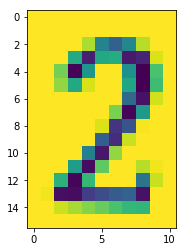

In [23]:
letter_image_file = 'extracted_letter_images/2/000001.png'

image = cv2.imread(letter_image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape) 
(h, w) = image.shape[:2] #cv.imread gets an array of h x w, h goes first
# add [:2] so that even if color image will work, not needed here though

plt.imshow(image)
plt.show()

Since `h > w`, we make sure `h` fits in our desired height value, e.g., 20:

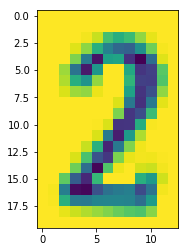

In [24]:
import imutils

image = imutils.resize(image, height=20)
# imutils.resize maintains the aspect ratio

plt.imshow(image)
plt.show()

Now we pad along width to make the image square, i.e., 20 x 20:

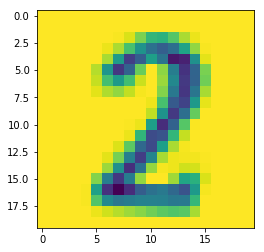

In [25]:
# determine the padding values for the width (= 20)
# to obtain the target dimensions
padW = int((20 - image.shape[1]) / 2.0) # may have rounding

# pad the image
image = cv2.copyMakeBorder(image, 0, 0, padW, padW,
        cv2.BORDER_REPLICATE)

# apply one more resizing to handle any rounding issues
image = cv2.resize(image, (20, 20))

plt.imshow(image)
plt.show()

Using what you learned, now write a function to resize images. Note that you also need to handle the possible case `h < w`:

In [26]:
def resize_to_fit(image, width, height):


    (h, w) = image.shape[:2] 

    if w > h:
        image = imutils.resize(image, width=width)

    else:
        image = imutils.resize(image, height=height)

   
    padW = int((width - image.shape[1]) / 2.0)
    padH = int((height - image.shape[0]) / 2.0)

    # pad the image then apply one more resizing to handle any
    # rounding issues
    image = cv2.copyMakeBorder(image, padH, padH, padW, padW,
        cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (20,20))

    # return the pre-processed image
    return image

Prepare the training and validating datasets:

In [27]:
from imutils import paths

# initialize the data and labels
data = []
labels = []

progress_folder = ''
LETTER_IMAGES_FOLDER = "extracted_letter_images"

# loop over the input images
# imutils.paths.list_images will list all images in the 32 subfolders
for image_file in paths.list_images(LETTER_IMAGES_FOLDER):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the letter so it fits in a 20x20 pixel box
    image = resize_to_fit(image, 20, 20)

    # Add a third channel dimension to the image to make Keras happy
    image = np.expand_dims(image, axis=2)

    # Grab the name of the letter based on the folder it was in
    label = image_file.split(os.path.sep)[-2]
    # extracted_letter_images/2/000001.png, after split
    # extracted_letter_images, 2, 000001.png
    # so 2 is the 2nd last, accessed using index -2
    
    if label != progress_folder:
        print('Processing Folder', label)
        progress_folder = label
    
    # Add the letter image and it's label to our training data
    data.append(image)
    labels.append(label)

Processing Folder 2
Processing Folder 3
Processing Folder 4
Processing Folder 5
Processing Folder 6
Processing Folder 7
Processing Folder 8
Processing Folder 9
Processing Folder A
Processing Folder B
Processing Folder C
Processing Folder D
Processing Folder E
Processing Folder F
Processing Folder G
Processing Folder H
Processing Folder J
Processing Folder K
Processing Folder L
Processing Folder M
Processing Folder N
Processing Folder P
Processing Folder Q
Processing Folder R
Processing Folder S
Processing Folder T
Processing Folder U
Processing Folder V
Processing Folder W
Processing Folder X
Processing Folder Y
Processing Folder Z


Convert lists into NumPy arrays as required by Keras for input + data normalization:

In [28]:
# scale the raw pixel intensities to the range [0, 1] (this is important!!!)
data = np.array(data, dtype="float") / 255.0

# you may also use std rather than 255, and center the data by mean as follows:
#data = (np.array(data, dtype="float") - data.mean()) / data.std()
# in this case you need to remember the mean and std for use during testing later

# scaling is not needed if you use BatchNormalization after Conv2D and before Activation

labels = np.array(labels)

Split into training and validation datasets:

In [29]:
from sklearn.preprocessing import LabelBinarizer

# Convert the labels (letters) into one-hot encodings that Keras can work with
lb = LabelBinarizer().fit(labels)
print(lb.classes_)
labels = lb.transform(labels)
print()
print(labels)

['2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'J' 'K'
 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [30]:
import pickle

MODEL_LABELS_FILENAME = "model_labels.dat"

# Save the mapping from labels to one-hot encodings.
# We'll need this later when we use the model to decode what it's predictions mean
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lb, f)

Now we are ready to train it using Keras. We’ll use a simple convolutional neural network architecture with two convolutional layers and two fully-connected layers:

In [31]:
from tensorflow.python.keras.backend import clear_session
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

clear_session() # free existing Keras models

# Build the neural network!
model = Sequential()

# First convolutional layer with max pooling
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer with max pooling
model.add(Conv2D(50, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Hidden layer with 500 nodes
model.add(Flatten())
model.add(Dense(500, activation="relu"))

# Output layer with 32 nodes (one for each possible letter/number we predict)
model.add(Dense(32, activation="softmax"))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 20, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 50)        9050      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1250)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               625500    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16032     
Total para

Using TensorFlow backend.


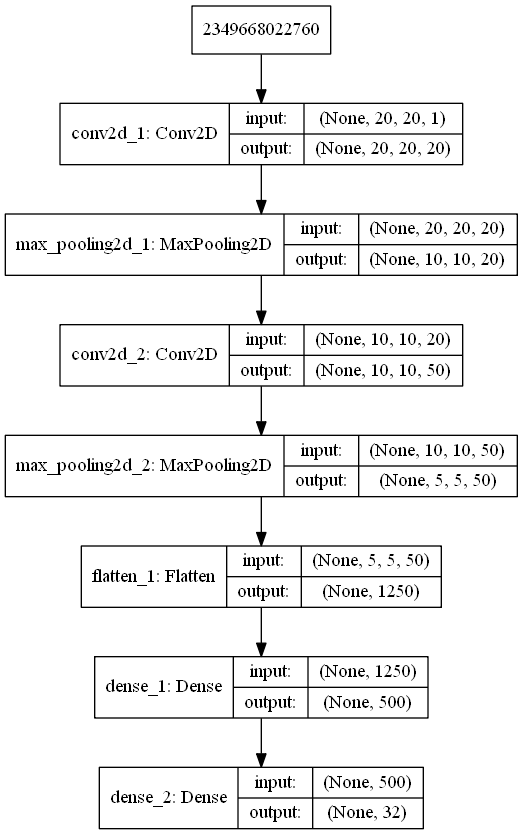

In [33]:
from keras.utils.vis_utils import plot_model

MODEL_PLOT_FILE = 'model_plot.png'
plot_model(model, to_file=MODEL_PLOT_FILE, show_shapes=True, show_layer_names=True)
display(Image(filename=MODEL_PLOT_FILE))

Questions: (1) Why `conv2d_1` has 9050 parameters? (2) Why `dense` has 625500 parameters?

Hint: self-study http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf
    
**Type Your Answer Here:**

Q1. We have taken 20x20 image with depth of 20. After max pooling we've reduced the size to 10x10 with same depth. In the second, conv2d, we take this 10x10 image with 50 feature maps. Conv2D is (3x3) with 20depth from max pooling. Also we need to add 1 as bias. The equation is (((3x3x20) + 1 ) x 50) = 9050parameters

Q2. After 2nd maxpooling, we need to flatten image to one dimension vector. Also add 1 bias. The equation is ((1250+1)x500) = 625500 parameters


Now, let us do the actual training:

In [34]:
# Ask Keras to build the TensorFlow model behind the scenes
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Train the neural network, 20% of the data is used for validation
model.fit(data, labels, validation_split=0.20, batch_size=32, epochs=10, verbose=1)

Train on 31803 samples, validate on 7951 samples
Epoch 1/10
31803/31803 [==============================] - 54s 2ms/step - loss: 0.3560 - acc: 0.9328 - val_loss: 11.7630 - val_acc: 0.0704
Epoch 2/10
31803/31803 [==============================] - 45s 1ms/step - loss: 0.1434 - acc: 0.9792 - val_loss: 10.6171 - val_acc: 0.0706
Epoch 3/10
31803/31803 [==============================] - 44s 1ms/step - loss: 0.1230 - acc: 0.9812 - val_loss: 11.0329 - val_acc: 0.0706
Epoch 4/10
31803/31803 [==============================] - 44s 1ms/step - loss: 0.1122 - acc: 0.9823 - val_loss: 12.6957 - val_acc: 0.0706
Epoch 5/10
31803/31803 [==============================] - 40s 1ms/step - loss: 0.1030 - acc: 0.9830 - val_loss: 11.0910 - val_acc: 0.0706
Epoch 6/10
31803/31803 [==============================] - 40s 1ms/step - loss: 0.0968 - acc: 0.9831 - val_loss: 12.8954 - val_acc: 0.0706
Epoch 7/10
31803/31803 [==============================] - 40s 1ms/step - loss: 0.0918 - acc: 0.9841 - val_loss: 13.0599 - v

Save the model for later use:

In [36]:
MODEL_FILENAME = "captcha_model.hdf5"

# Save the trained model to disk
model.save(MODEL_FILENAME)

When divided by 255, we can observe that there is more loss.

## Step 3: Use the model to solve CAPTCHAs!

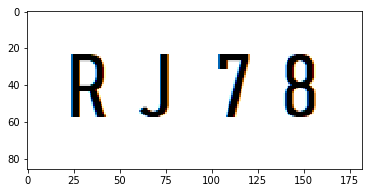

In [53]:
#reading image from local disk
from cv2 import imread
image = imread(r"C:\Users\Avinash\Desktop\avi.png")
plt.imshow(image)

Load saved model data:

In [57]:
from tensorflow.python.keras.models import load_model
import pickle

MODEL_FILENAME = "captcha_model.hdf5"
MODEL_LABELS_FILENAME = "model_labels.dat"

# Load up the model labels (so we can translate model predictions to actual letters)
with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

# Load the trained neural network
model = load_model(MODEL_FILENAME)

Load packages and define functions for independent running of Part 3:

In [40]:
import numpy as np
import imutils
import cv2

# [!!! please also run the cell defining function "resize_to_fit" again, if you run Part 3 alone]

Get the letters from the downloaded images:

In [58]:
# Load the image and convert it to grayscale


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 20, 20, 20, 20, cv2.BORDER_REPLICATE)

# threshold the image (convert it to pure black and white)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# find the contours (continuous blobs of pixels) the image
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

letter_image_regions = []

# Now we can loop through each of the four contours and extract the letter
# inside of each one
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image_regions.append((x, y, w, h))

# If we found more or less than 4 letters in the captcha, our letter extraction
# didn't work correcly. Skip the image instead of saving bad training data!
if len(letter_image_regions) != 4:
    print('[WARNING]', TEST_FILE_NAME, 'has', len(letter_image_regions), 'contours, unable to process')
else:
    print('[SUCCESS]')

[SUCCESS]


If you see a warning, use another image instead and repeat the previous steps.

Otherwise, continue to create an output image:

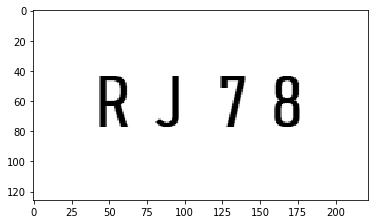

In [59]:
# Sort the detected letter images based on the x coordinate to make sure
# we are processing them from left-to-right so we match the right image
# with the right letter
letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

# Create an output image and a list to hold our predicted letters
output = cv2.merge([gray] * 3) # 2D gray image -> 3D color image

# show the 3D image
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(output)
plt.show()

CAPTCHA text is: RJ78


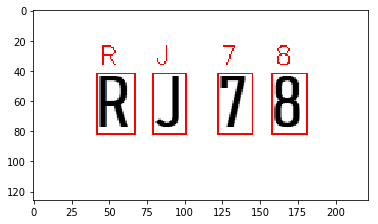

In [60]:
predictions = []

# Save out each letter as a single image
for letter_bounding_box in letter_image_regions:
    # Grab the coordinates of the letter in the image
    x, y, w, h = letter_bounding_box

    # Extract the letter from the original image with a 2-pixel margin around the edge
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

    # Re-size the letter image to 20x20 pixels to match training data
    letter_image = resize_to_fit(letter_image, 20, 20)
    
    # Turn the single image into a 4D list of images to make Keras happy
    # 4D: image_number (=1) x height x width x channel (=1)
    letter_image = np.expand_dims(letter_image, axis=2)
    letter_image = np.expand_dims(letter_image, axis=0)
    
    # Ask the neural network to make a prediction
    prediction = model.predict(letter_image) # output is one-hot encoded
        
    letter = lb.inverse_transform(prediction)[0]
    # use [0] since there is only one test data's label item in the list
    predictions.append(letter)
    
    # draw the prediction on the output image
    # (255, 0, 0) = red
    cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (255, 0, 0), 1)
    cv2.putText(output, letter, (x, y - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255, 0, 0), 1)

# see prediction result:

# Print the captcha's text
captcha_text = "".join(predictions)
print("CAPTCHA text is: {}".format(captcha_text))

# Show the annotated image
plt.imshow(output)
plt.show()

Questions: Is the prediction correct? How many letters are correctly predicted?
    
**Type Your Answer Here:**

All 4 predicted correctly